# Pytorch Tutorial
[Pytorch Tutorial学习笔记](https://www.yuque.com/hansonyun/cy91ib/ukvxkoi1s5ab6r5u) 这个是自己的学习教程，主要是为了记录自己的学习过程，方便以后查阅，也希望能够帮助到其他人。

# Pytorch Tensor操作
记录Tensor的一些操作示例，实践了才知道怎么使用。

## Tensor类型查看及检查

In [ ]:
import torch
# Create a tensor of size (2, 3) from a normal distribution
a = torch.randn(2, 3)

b = torch.FloatTensor(2, 3)
# Show tensor a type
print(a.type())
print(type(a)) # 这块有个疑问，为什么type(a)和a.type()的结果不一样？ 理论上来说type()也是输出子类的情况啊

# Check tensor type
print(isinstance(a, torch.Tensor))


## Tensor 数据从CPU转到GPU
Tensor数据在CPU和GPU上时是不同的类型，在不同的设备上进行计算时，需要将数据转到相同的设备上。

In [ ]:
import torch
# Create a tensor of size (2, 3) from a normal distribution
a = torch.randn(2,3)

# print current tensor device
print(a.device)

# transfer tensor to GPU 0
if torch.cuda.is_available():
    a = a.cuda()
    print(a.device)

## 不同维度的Tensor及其属性
Tensor的维度是指Tensor的阶数，也就是Tensor的维度数目，比如一维Tensor的维度是1，二维Tensor的维度是2，以此类推。Tensor的维度属性是一个元组，元组的长度就是Tensor的维度，元组中的每个元素代表了Tensor在该维度上的长度。其维度可以通过Tensor的dim()方法查看，也可以通过Tensor的ndimension()方法查看。
查看其属性可以通过Tensor的shape属性，也可以通过Tensor的size()方法。查看元素的个数可以通过Tensor的numel()方法。


In [ ]:
import torch

# 0维Tensor，标量，可以用于表示loss
a = torch.tensor(1.0)
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

# 1维Tensor，向量，可以用于表示bias
a = torch.tensor([1.0])
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

a = torch.tensor([1.0,2.0,3.0,4.0])
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

a = torch.FloatTensor(2)
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

# 2维Tensor，矩阵，可以用于表示weight
a = torch.tensor([[1.0,2.0],[3.0,4.0]])
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

a = torch.FloatTensor(2,3)
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

# 3维Tensor，可以用于表示RNN的输入
a = torch.tensor([[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0,8.0]]])
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

a = torch.FloatTensor(2,3,4)
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())


# 4维Tensor，可以用于表示CNN的输入
a = torch.tensor([[[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0,8.0]]],[[[9.0,10.0],[11.0,12.0]],[[13.0,14.0],[15.0,16.0]]]])
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())

a = torch.FloatTensor(2,3,4,5)
print('dim',a.dim(),a.ndimension())
print('shape',a.shape)
print('size',a.size())
print('numel',a.numel())



# Tensor的基本操作

## Tensor的创建
- 固定元素初始化创建(指定每个元素的值): 从list创建, torch.tensor();从numpy创建，torch.from_numpy()
- 固定元素初始化创建(指定Tensor shape): torch.eye(), torch.zeros(), torch.zeros_like(), torch.ones(), torch.ones_like(), torch.full(), torch.full_like(), torch.range(), torch.arange(), torch.linspace(), torch.logspace()
- 随机元素初始化创建(值随机选取): torch.empty(), torch.empty_like(), torch.Tensor(), torch.FloatTensor(), torch.IntTensor(), torch.DoubleTensor()
- 随机元素初始化创建(指定值分布): torch.rand()，torch.rand_like(), torch.randint(), torch.randn()，torch.randn_like(), torch.normal(), torch.randperm()

In [ ]:
import numpy as np
import torch

# ------------------------------固定元素初始化创建(指定每个元素的值)--------------------------------
# 从list创建Tensor
a = torch.tensor(1.0, dtype=torch.float32); print(a)
a = torch.tensor([1.0,2.0,3.0,4.0]); print(a)
a = torch.tensor([[1.0,2.0],[3.0,4.0]]); print(a)

# 从numpy创建Tensor
a = torch.from_numpy(np.array([1.0,2.0,3.0,4.0])); print(a)

#-----------------------------固定元素初始化创建(指定Tensor shape)--------------------------------
# 从eye创建Tensor,只能创建2D Tensor
a = torch.eye(3,4); print('eye', a)

# 从zeros, zeros_like创建Tensor
a = torch.zeros(3,4); print('zeros', a)
a = torch.zeros_like(a); print('zeros_like', a)

# 从ones, ones_like创建Tensor
a = torch.ones(3,4); print('ones', a)
a = torch.ones_like(a); print('ones_like', a)


# 从full，full_like创建Tensor
a = torch.full((3,4), 1.0); print('full', a)
a = torch.full_like(a, 2.0); print('full_like', a)

# 从range创建Tensor， range左闭右闭，且必须输入两个值; torch.range即将被弃用
a = torch.range(1, 10); print('range', a)

# 从arange创建Tensor，arange左闭右开
a = torch.arange(1, 10, 2); print('arange', a)
a = torch.arange(10); print('arange', a) # 从0开始, 默认步长为1
a = torch.arange(10,0,-1); print('arange', a) # 从10开始，步长为-1

# 从linespace创建Tensor，linespace左闭右闭
a = torch.linspace(1, 10, 20); print('linspace', a)

# 从logspace创建Tensor，logspace左闭右闭
a = torch.logspace(1, 10, 20, 2); print('logspace', a) # 从[1,10]生成20个数，然后以2为底进行指数运算

# ------------------------------------随机元素初始化创建(值随机选取)--------------------------------
# 从empty创建Tensor
a = torch.empty(3,4); print('empty', a)
a = torch.empty_like(a); print('empty_like', a)

# 从Tensor创建Tensor
a = torch.Tensor(3,4); print('Tensor', a)
a = torch.FloatTensor(3,4); print('FloatTensor', a)
a = torch.IntTensor(3,4); print('IntTensor', a)
a = torch.LongTensor(3,4); print('LongTensor', a)

# ------------------------------------随机元素初始化创建(指定值分布)-------------------------------- 
# 从rand创建Tensor, rand为均匀分布
a = torch.rand(3,4); print('rand', a)
a = torch.rand_like(a); print('rand_like', a)

# 从randint创建Tensor, randint为均匀分布
a = torch.randint(0, 10, (3,4)); print('randint', a)

# 从randn创建Tensor, randn为标准正态分布
a = torch.randn(3,4); print('randn', a)
a = torch.randn_like(a); print('randn_like', a)

# 从normal创建Tensor, normal为正态分布
a = torch.normal(mean=torch.full((10,), 0.0), std=torch.arange(1.0, 0.0, -0.1)); print('normal', a)

# 从randperm创建Tensor, randperm为随机排列，用于生成随机不重复整数序列
a = torch.randperm(10); print('randperm', a)



## Tensor索引及切片
Tensor的索引及切片操作与numpy的操作类似，但是Tensor的索引及切片操作是在原Tensor上进行的，而numpy的索引及切片操作是在原数据的拷贝上进行的。也就是说，索引得到的是原数据的引用。

In [ ]:
a = torch.randn(4,3,28,28)
print("a",a)

# 验证索引是原数据的引用
a[0][0][0][0] = 2023.0
print("change a", a)

# 索引单个位置
a_0 = a[0]; print('a_0', a_0.shape)
a_0_0 = a[0][0]; print('a_0_0', a_0_0.shape) # 或a[0,0]
a_0_0_0 = a[0][0][0]; print('a_0_0_0', a_0_0_0.shape) # 或a[0,0,0]
a_0_0_0_0 = a[0][0][0][0]; print('a_0_0_0_0', a_0_0_0_0, a_0_0_0_0.shape) # 或a[0,0,0,0]

# 索引前N个或后N个
a_2 = a[:2]; print('a_2', a_2.shape)
a_2_1 = a[:2,:1]; print('a_2_1', a_2_1.shape)
a_2_1_3 = a[:2,:1,:3]; print('a_2_1_3', a_2_1_3.shape) # 或a[:2,:1,:3]

# 根据步长索引
a_s_2 = a[::2]; print('a_s_2', a_s_2.shape)
a_s_2 = a[:,::2,1:10:2,:]; print('a_s_2', a_s_2.shape)

# 根据index_select索引,维度，索引具体位置
a_0 = a.index_select(0, torch.tensor([0,1])); print('a_0', a_0.shape)

# 使用...索引，...表示任意多维, 会根据前后维度自动补全
a_0 = a[0,...]; print('a_0', a_0.shape)
a_0 = a[0,...,1]; print('a_0', a_0.shape)
a_0 = a[0,...,1:10:2]; print('a_0', a_0.shape)

# 使用masked_select索引, 默认会将Tensor转换为1D Tensor
mask = a.ge(0.5); print('mask', mask)
a_0 = a.masked_select(mask); print('a_0', a_0.shape)

# 使用take索引, 默认会将Tensor转换为1D Tensor, 然后在根据传入的1D Tensor进行索引
a_0 = a.take(torch.tensor([0,1,2,3,4,5,6,7,8,9])); print('a_0', a_0.shape)

## Tensor的维度变换
- view/reshape: view和reshape的作用是将Tensor的维度变换为指定的维度，但是view只能用于contiguous Tensor，而reshape可以用于任意Tensor。这里需要注意view和reshape后的内容要有意义。
- squeeze/unsqueeze: squeeze和unsqueeze的作用是一样的，都是在Tensor的指定维度上增加或者减少一个维度。unsqueeze有个口诀，传入正数在之前插入，传入负数在之后插入。
- transpose/t/permute: transpose和t的作用是一样的，都是将Tensor的两个维度进行交换，permute可以对Tensor的多个维度进行交换。
- expand/repeat: expand和repeat的作用是一样的，都是将Tensor的指定维度进行复制; expand要求Tensor在指定维度上的长度为1，而repeat没有这个要求。

In [ ]:
# view操作进行Tensor维度变换, 更改前后元素数量要一致
a = torch.randn(4,3,28,28)
a_0 = a.view(4,3,28*28); print('a_0', a_0.shape) # 合并最后两个维度，从图像上来理解的话，变成了4张图像，每张图像有3个通道，每个通道有784个像素点
a_0 = a.view(4,3*28,28); print('a_0', a_0.shape) # 合并中间两个维度，从图像上来理解的话，变成了4张图像，每张图像有84行，每行有28个像素点
a_0 = a.view(4*3,28,28); print('a_0', a_0.shape) # 合并前两个维度，从图像上来理解的话，变成了12张图像，每张图像有28行，每行有28个像素点

# reshape操作进行Tensor维度变换, 更改前后元素数量要一致
a_1 = a.reshape(4,3,28*28); print('a_1', a_1.shape) # 合并最后两个维度，从图像上来理解的话，变成了4张图像，每张图像有3个通道，每个通道有784个像素点
a_1 = a.reshape(4,3*28,28); print('a_1', a_1.shape) # 合并中间两个维度，从图像上来理解的话，变成了4张图像，每张图像有84行，每行有28个像素点
a_1 = a.reshape(4*3,28,28); print('a_1', a_1.shape) # 合并前两个维度，从图像上来理解的话，变成了12张图像，每张图像有28行，每行有28个像素点

# squeeze操作进行Tensor维度变换, 去除维度为1的维度
a = torch.randn(1,3,1,1)
a_2 = a.squeeze(); print('a_2', a_2.shape)
a_2 = a.squeeze(0); print('a_2', a_2.shape)
a_2 = a.squeeze(2); print('a_2', a_2.shape)

# unsqueeze操作进行Tensor维度变换, 在指定位置增加维度为1的维度
a = torch.randn(3,28,28)
a_3 = a.unsqueeze(0); print('a_3', a_3.shape)
a_3 = a.unsqueeze(1); print('a_3', a_3.shape)
a_3 = a.unsqueeze(-1); print('a_3', a_3.shape)

# t操作进行Tensor维度变换, 交换维度; 只能用于2D Tensor
a = torch.randn(3,4)
a_4 = a.t(); print('a_4', a_4.shape)

# transpose操作进行Tensor维度变换, 交换维度; 可以用于多维Tensor
a = torch.randn(3,4,5)
a_5 = a.transpose(1,2); print('a_5', a_5.shape)
a_5 = a.transpose(0,2); print('a_5', a_5.shape)
a_5 = a.transpose(0,1); print('a_5', a_5.shape)

# permute操作进行Tensor维度变换, 交换维度; 可以用于多维Tensor
a = torch.randn(3,4,5)
a_6 = a.permute(1,2,0); print('a_6', a_6.shape)
a_6 = a.permute(2,0,1); print('a_6', a_6.shape)
a_6 = a.permute(0,2,1); print('a_6', a_6.shape)

# expand操作进行Tensor维度变换, 如果待扩展维度为1，则扩展为指定维度；如果待扩展维度不为1且与原维度不一致，则报错
a = torch.randn(1,4,5)
a_7 = a.expand(3,4,5); print('a_7', a_7.shape)

# repeat操作进行Tensor维度变换, 传入参数为每个维度的重复次数
a = torch.randn(3,4,5)
a_8 = a.repeat(2,1,1); print('a_8', a_8.shape)

## Tensor Broadcast自动扩展
tensor broadcast是指在进行运算时，如果两个tensor的shape不一样，会自动扩展成一样的shape，然后再进行运算。tensor broadcast的规则如下：
- 对两个tensor的shape从后往前进行比较，如果两个tensor的shape在某个维度上相同或者其中一个tensor在该维度上的长度为1，则这两个tensor在该维度上是兼容的，可以进行broadcast。
- 如果两个tensor在某个维度上都不为1，且两个tensor在该维度上的长度不相等，则这两个tensor在该维度上是不兼容的，不能进行broadcast。
- 满足第一个条件的情况下，如果两个tensor的维度数目不同，则在较小的tensor的shape前面补1，使得两个tensor的维度数目相同，然后再进行比较。
  
为什么要使用Broadcast？ 一是有实际需求，二是可以减少内存的使用。

In [ ]:
# broadcast操作进行Tensor自动扩展
a = torch.randn(3,4,5)
b = torch.randn(4,5)
c = a + b; print('c', c.shape)

a = torch.randn(3,1)
b = torch.randn(1,3)
c = a + b; print('c', c.shape)

a = torch.randn(3,1,5)
b = torch.tensor([0.5])
c = a * b; print('c', c.shape)

## Tensor拼接及分割
- cat: cat是concatenate的缩写，指的是将多个Tensor在指定维度上进行拼接;要求除了指定维度外，其他维度的长度必须一致。
- stack: stack是将多个Tensor在指定维度上进行堆叠，堆叠后的Tensor的维度比原来的Tensor的维度多1;要求待堆叠的Tensor的shape必须一致。
- split: split是将Tensor在指定维度上进行分割
- chunk: chunk是将Tensor在指定维度上进行分割；chunk是分块的意思，从官网上的意思看，如果可以整除，则每个块的长度相同，如果不能整除，则最后一个块的长度可能会不同（是不是这里隐含着最后一个块的大小要小于其他块）。

In [ ]:
# cat操作进行Tensor拼接, 拼接的维度必须一致
a = torch.randn(3,4)
b = torch.randn(3,5)
c = torch.cat([a,b], dim=1); print('c', c.shape)

# stack操作进行Tensor拼接, 拼接的维度必须一致；dim指定拼接的维度
a = torch.randn(3,4)
b = torch.randn(3,4)
c = torch.stack([a,b], dim=0); print('c', c.shape)

# split操作进行Tensor拆分
a = torch.randn(3,4)
b, c = a.split([1,2], dim=0); print('b', b.shape,'c', c.shape)
b, c, d = a.split([1,1,2], dim=1); print('b', b.shape,'c', c.shape, 'd', d.shape)

# chunk操作进行Tensor拆分
a = torch.randn(3,5)
b, c = a.chunk(2, dim=0); print('b', b.shape,'c', c.shape)
b, c, d = a.chunk(3, dim=1); print('b', b.shape,'c', c.shape, 'd', d.shape)


## Tensor的基本运算
- Tensor逐元素加减乘除: +, -, *, /, add, sub, mul, div
- Tensor乘法： @, matmul, mm(只适合二维Tensor)
- Tensor逐元素n次方: pow(**), sqrt, rsqrt
- Tensor逐元素取对数: log, log2, log10, log1p
- Tensor逐元素取指数: exp, exp2
- Tensor逐元素取近似值: ceil, floor, round, trunc, frac
- Tensor逐元素取余: fmod, remainder；两种只是在trunc_mode上有些不同
- Tensor逐元素取绝对值: abs, absolute
- Tensor逐元素取符号: sign
- Tensor逐元素取上下限: clamp, clamp_max, clamp_min, clip
- Tensor逐元素取反: neg
- Tensor逐元素比较: >, >=, <, <=, ==, !=, gt, ge, lt, le, eq, ne，isclose
- Tensor之间比较: allclose, equal
- Tensor逐元素逻辑运算: &, |, ^, ~, logical_and, logical_or, logical_xor, logical_not
- Tensor逐元素取倒数: reciprocal
- Tensor逐元素取三角函数: sin, cos, tan, asin, acos, atan, atan2, sinh, cosh, tanh, asinh, acosh, atanh


In [ ]:
import torch
# Tensor逐元素加减乘除，要求两个Tensor的shape一致
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = a + b; print('+', c)
c = a.add(b); print('add', c)
c = a - b; print('-', c)
c = a.sub(b); print('sub', c)
c = a * b; print('*', c)
c = a.mul(b); print('mul', c)
c = a / b; print('/', c)
c = a.div(b); print('div', c)

# Tensor 二维mm乘法，要求符合矩阵乘法规则
a = torch.randn(3,4); print('a', a)
b = torch.randn(4,5); print('b', b)
c = torch.mm(a,b); print('mm', c)

# Tensor matmul乘法，要求符合矩阵乘法规则, 除最后两维外，其他维度必须一致
a = torch.randn(3,4,5); print('a', a)
b = torch.randn(3,5,6); print('b', b)
c = torch.matmul(a,b); print('matmul', c)
c = a@b; print('@', c)

# Tensor 逐元素n次方
a = torch.randn(3,4); print('a', a)
c = a.pow(2); print('pow', c)
c = a**2; print('**', c)
c = a.sqrt(); print('sqrt', c)      # sqrt 为平方根
c = a.rsqrt(); print('rsqrt', c)    # rsqrt 为平方根倒数(reciprocal of the square root)

# Tensor 逐元素取对数
a = torch.randn(3,4); print('a', a)
c = a.log(); print('log', c)
c = a.log2(); print('log2', c)
c = a.log10(); print('log10', c)
c = a.log1p(); print('log1p', c)    # log1p 为log(1+x)

# Tensor 逐元素取指数
a = torch.randn(3,4); print('a', a)
c = a.exp(); print('exp', c)
c = a.exp2(); print('exp2', c)    # exp2 为2的指数

# Tensor 逐元素近似
a = torch.randn(3,4); print('a', a)
c = a.ceil(); print('ceil', c)    # ceil 为向上取整
c = a.floor(); print('floor', c)  # floor 为向下取整
c = a.round(); print('round', c)  # round 为四舍五入
c = a.trunc(); print('trunc', c)  # trunc 为截断取整
c = a.frac(); print('frac', c)    # frac 为取小数部分

# Tensor 逐元素取余
a = torch.randn(3,4); print('a', a)
c = a.remainder(1); print('remainder', c)    # remainder: torch.remainder(a, b) == a - a.div(b, rounding_mode="floor") * b
c = a.fmod(1); print('fmod', c)              # fmod: torch.fmod(a, b) == a - a.div(b, rounding_mode="trunc") * b

# Tensor 逐元素取绝对值
a = torch.randn(3,4); print('a', a)
c = a.abs(); print('abs', c)
c = a.absolute(); print('absolute', c)

# Tensor 逐元素取符号
a = torch.randn(3,4); print('a', a)
c = a.sign(); print('sign', c)

# Tensor 逐元素取上下限
a = torch.randn(3,4); print('a', a)
c = a.clamp(-0.1, 0.1); print('clamp', c)
c = a.clamp_max(0.1); print('clamp_max', c)
c = a.clamp_min(-0.1); print('clamp_min', c)
c = a.clip(-0.1, 0.1); print('clip', c)

# Tensor 逐元素取反
a = torch.randn(3,4); print('a', a)
c = a.neg(); print('neg', c)

# Tensor 逐元素比较
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = a > b; print('>', c)
c = a >= b; print('>=', c)
c = a < b; print('<', c)
c = a <= b; print('<=', c)
c = a == b; print('==', c)
c = a != b; print('!=', c)
c = a.isclose(b); print('isclose', c)

# Tensor 比较
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = torch.equal(a, b); print('equal', c)
c = torch.allclose(a, b); print('allclose', c)

# Tensor 逐元素逻辑运算
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = torch.logical_and(a>0, b>0); print('logical_and', c)
c = torch.logical_or(a>0, b>0); print('logical_or', c)
c = torch.logical_xor(a>0, b>0); print('logical_xor', c)
c = torch.logical_not(a>0); print('logical_not', c)

# Tensor 逐元素取倒数
a = torch.randn(3,4); print('a', a)
c = a.reciprocal(); print('reciprocal', c)

# Tensor 逐元素取三角函数
a = torch.randn(3,4); print('a', a)
c = a.sin(); print('sin', c)
c = a.cos(); print('cos', c)
c = a.tan(); print('tan', c)

## Tensor的属性及统计信息
- Tensor的最大最小值及位置: max, min，argmax, argmin
- Tensor的均值及方差: mean, std
- Tensor指定维度 的累加和累乘: sum, prod; 
- Tensor指定维度的累加和累乘: cumsum, cumprod; 会保持原Tensor的维度，只是在指定维度上进行累加或累乘
- Tensor的范数: norm
- Tensor的距离: dist
- Tensor的非零元素: nonzero
- Tensor的k统计属性: topk, kthvalue
- Tensor的唯一元素: unique; 返回剔除重复元素后的Tensor
- Tensor的元素属性判断: isfinite, isinf, isnan, isneginf, isposinf
- Tensor的统计: bincount, count_nonzero, histogram

In [ ]:
import torch
# Tensor的最大值最小值及其索引，可以使用dim参数指定维度以及keepdim参数保持维度不变
a = torch.randn(3,4); print('a', a)
c = a.max(dim=1,keepdim=True); print('max', c)
c = a.min(); print('min', c)
c = a.argmax(dim=1,keepdim=True); print('argmax', c)
c = a.argmin(); print('argmin', c)

# Tensor的均值及方差, 可以使用dim参数指定维度以及keepdim参数保持维度不变
a = torch.randn(3,4); print('a', a)
c = a.mean(dim=1,keepdim=True); print('mean', c)
c = a.std(); print('std', c)

# Tensor所有要素的累加和累积
a = torch.randn(3,4); print('a', a)
c = a.sum(); print('sum', c)
c = a.prod(); print('prod', c)

# Tensor所有要素的累加和累积，保持维度不变
a = torch.randn(3,4); print('a', a)
c = a.cumsum(dim=1); print('cumsum', c)
c = a.cumprod(dim=1); print('cumprod', c)

# Tensor的范数，范数的计算公式为：norm = (x1^p + x2^p + ... + xn^p)^(1/p)
a = torch.randn(3,4); print('a', a)
c = a.norm(1); print('norm-1', c)
c = a.norm(2); print('norm-2', c)

# Tensor的距离，距离的计算公式为：dist = (x1-y1)^p + (x2-y2)^p + ... + (xn-yn)^p)^(1/p)
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = torch.dist(a, b, 1); print('dist-1', c)
c = torch.dist(a, b, 2); print('dist-2', c)

# Tensor的非0元素, 返回的是非0元素的索引
a = torch.randn(3,4); print('a', a)
c = a.nonzero(); print('nonzero', c)

# Tensor的k属性统计
a = torch.randn(3,4); print('a', a)
c = a.kthvalue(2,dim=0); print('kthvalue', c)
c = a.topk(2,dim=0); print('topk', c)

# Tensor的unique属性统计
a = torch.tensor([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5]); print('a', a)
c = a.unique(); print('unique', c)

# Tensor逐元素判断特性
a = torch.randn(3,4); print('a', a)
c = a.isfinite(); print('isfinite', c)
c = a.isinf(); print('isinf', c)
c = a.isnan(); print('isnan', c)
c = a.isposinf(); print('isposinf', c) # 正无穷
c = a.isneginf(); print('isneginf', c) # 负无穷

# Tensor的统计信息
a = torch.randint(1,100,(10,),dtype=torch.int32); print('a', a)
c = a.bincount(); print('bincount', c) # torch bincount只能处理非负整数
c = a.count_nonzero(); print('count_nonzero', c) # 输出非0元素的个数
a = torch.randn(3,4,5); print('a', a)
c = a.histogram(bins=4); print('histogram', c) # 输出一维直方图,就是将数据分成bins个区间，然后统计每个区间的个数

a = torch.randn(3,4); print('a', a)
c = torch.histogramdd(a, bins=[3,5,3,3]); print('histogramdd', c) # 输出多维直方图,这里所谓的多维直方图就是每一列的直方图;就是将数据分成bins个区间，然后统计每个区间的个数


## Tensor的一些高级操作
- Tensor的where操作: where指的是根据条件从两个Tensor中选择元素组成一个新的Tensor, 使用where的好处是可以并行化处理。
- Tensor的gather操作: gather的作用是根据索引从Tensor中取出元素组成一个新的Tensor。

In [ ]:
# Tensor的where操作
a = torch.randn(3,4); print('a', a)
b = torch.randn(3,4); print('b', b)
c = torch.where(a>0, a, b); print('where', c)

# Tensor的gather操作
prob = torch.randn(4,10); print('prob', prob)
label = torch.arange(10)*100; print('label', label)
idx = prob.topk(dim=1, k=3); print('idx', idx)
c = torch.gather(label.expand(4,10), dim=1, index=idx.indices); print('gather', c)

# 随机梯度下降
pytorch 在计算梯度的时候，实际上是把计算图保存在了输出的Tensor里面了，比如通过mse_loss或者直接通过手写公式计算的时候，都会把计算图保存在输出的Tensor里面，然后通过backward函数来计算梯度，这样就可以实现自动求导了。

## 激活函数及其梯度及其梯度计算
- sigmoid激活函数: 其表达式为$\sigma(x) = \frac{1}{1+e^{-x}}$, 其梯度为$\sigma'(x) = \sigma(x)(1-\sigma(x))$。其缺点是当x的绝对值很大时，其梯度会趋近于0，导致梯度消失。
- tanh激活函数: 其表达式为$\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$, 其梯度为$\tanh'(x) = 1-\tanh^2(x)$。其缺点是当x的绝对值很大时，其梯度会趋近于0，导致梯度消失。
- ReLU激活函数: 其表达式为$\text{ReLU}(x) = \max(0, x)$, 其梯度为$\text{ReLU}'(x) = \begin{cases} 0, & x<0 \\ 1, & x>0 \end{cases}$。其缺点是当x<0时，其梯度为0，导致梯度消失。

In [ ]:
import torch

# Tensor sigmoid 激活函数
a = torch.randn(10); print('a', a)
c = torch.sigmoid(a); print('sigmoid', c)

# Tensor tanh 激活函数
a = torch.randn(10); print('a', a)
c = torch.tanh(a); print('tanh', c)

# Tensor relu 激活函数
a = torch.randn(10); print('a', a)
c = torch.relu(a); print('relu', c)

## Loss函数及其梯度计算
- MSE(Mean Square Error)均方误差: 其表达式为$\text{loss}(y, f_{\theta}(x)) = \sum_{i=1}^n(y_i-f_{\theta}(x_i))^2$，其梯度为$\frac{\partial \text{loss}(y, f_{\theta}(x))}{\partial \theta} =\sum_{i=1}^n 2(y_i-f_{\theta}(x_i)) * \frac{\partial{f_{\theta}(x_i)}}{\partial{\theta}}$。
- SoftMax函数: Cross Entropy Loss一般搭配SoftMax函数使用。SoftMax函数的表达式为$\text{SoftMax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$，其梯度为$\frac{\partial \text{SoftMax}(x_i)}{\partial x_j} = \begin{cases} \text{SoftMax}(x_i)(1-\text{SoftMax}(x_i)) & i == j \\ -\text{SoftMax}(x_j)*\text{SoftMax}(x_i) & i \neq j \end{cases}$。

In [ ]:
# Tensor MSE MSE损失函数
x = torch.full((1,), 1); print('x', x)
w = torch.full((1,), 2.0); print('w', w)
mse = torch.nn.functional.mse_loss(torch.ones(1), x*w); print('mse', mse)

## 错误示例1: w没有设置requires_grad=True，导致无法求导
# torch.autograd.grad(mse, w)

## 错误示例2: w虽然设置了requires_grad=True，但是没有更新计算图，导致无法求导
# w.requires_grad_(True)
# torch.autograd.grad(mse, w)

# 正确示例: w设置了requires_grad=True，并且更新了计算图，导致可以求导
w.requires_grad_(True)
mse = torch.nn.functional.mse_loss(torch.ones(1), x*w); print('mse', mse)
torch.autograd.grad(mse, w)

# 正确实例，使用backward函数求导
w.requires_grad_(True)
mse = torch.nn.functional.mse_loss(torch.ones(1), x*w); print('mse', mse)
mse.backward();print('w.grad', w.grad)


# Tensor SoftMax 激活函数
a = torch.randn(10,requires_grad=True); print('a', a)
c = torch.softmax(a, dim=0); print('softmax', c)
p = torch.nn.functional.softmax(a, dim=0); print('softmax', p)

## 错误示例1: 对于loss函数求导，其output只能是一个标量，而不能是一个向量
# p.backward();print('a.grad', a.grad)
#
# 正确示例，使用grad求导
print(torch.autograd.grad(p[0], a,retain_graph=True)) # retain_graph=True表示保留计算图，否则会被释放
print(torch.autograd.grad(p[1], a))

## 单层感知机反向传播参数更新
- 单层单输出感知机梯度计算
- 单层多输出感知机梯度计算

In [ ]:
import torch
# 单层单输出感知机
x = torch.randn(1,10); print('x', x)
w = torch.randn(1,10,requires_grad=True); print('w', w)
o = torch.sigmoid(x@w.t()); print('o', o)
mse = torch.nn.functional.mse_loss(torch.ones(1,1), o)
mse.backward();print('w.grad', w.grad)

# 单层多输出感知机
x = torch.randn(1,10); print('x', x)
w = torch.randn(3,10,requires_grad=True); print('w', w)
o = torch.sigmoid(x@w.t()); print('o', o)
mse = torch.nn.functional.mse_loss(torch.ones(1,3), o); print('mse', mse)
mse.backward();print('w.grad', w.grad)

## 2d函数优化实例，主要使用梯度下降法
Himmelblau函数的表达式为$f(x, y) = (x^2+y-11)^2+(x+y^2-7)^2$，其最小值所在的位置为（3，2），（-2.805，3.131），（-3.7793，-3.283），（3.58，-1.84）


In [ ]:
# 演示梯度下降算法
import torch
import numpy as np
import matplotlib.pyplot as plt

def himmelblau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

def plot_himmelblau(x,y):
                        
    X, Y = np.meshgrid(x, y) # meshgrid函数用两个坐标轴上的点在平面上画格, 输出的是两个二维矩阵，第一个矩阵每个格子的值都是x轴的值，第二个矩阵每个格子的值都是y轴的值
    Z = himmelblau([X, Y])

    fig = plt.figure('himmelblau')
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z)
    ax.view_init(60, -30)
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    plt.show()

def gradient_decent():
    x = torch.tensor([0., 0.], requires_grad=True)
    optimizer = torch.optim.Adam([x], lr=1e-3)

    for step in range(20000):
        pred = himmelblau(x)
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        pred.backward() # 求解梯度
        optimizer.step() # 更新参数，等价于w = w - lr*grad

        if step % 200 == 0:
            print('step {}: x={}, f(x)={}'.format(step, x.tolist(), pred.item()))

plot_himmelblau(np.arange(-6, 6, 0.1), np.arange(-6, 6, 0.1))
gradient_decent()

# 多分类问题

## 分类问题简述
- 分类问题分为二分类问题和多分类问题。其中二分类问题在输出层使用sigmoid函数，多分类问题在输出层使用softmax函数。在多分类问题中，一般使用交叉熵损失函数。
- 在分类问题中，一般使用交叉熵损失函数，其表达式为$\text{loss}(y, f_{\theta}(x)) = -\sum_{i=1}^n y_i \log f_{\theta}(x_i)$，其中$y_i$为one-hot向量，$f_{\theta}(x_i)$为softmax函数的输出。熵的物理意义是所含信息的多少，熵越大，所含信息越少。交叉熵损失函数的物理意义是KL-Divergence，即两个分布之间的差异。不使用MSE损失函数的原因是，MSE损失函数在分类问题中，其梯度会趋近于0，导致梯度消失。

In [ ]:
import torch

# 验证entropy所代表的意义。熵越大，惊喜度越小，熵越小，惊喜度越大
a = torch.tensor([0.25,0.25,0.25,0.25]); print('a', a)
a_entropy = -torch.sum(a*torch.log2(a)); print('a的熵', a_entropy)
b = torch.tensor([0.8,0.1,0.075,0.025]); print('b', b)
b_entropy = -torch.sum(b*torch.log2(b)); print('b的熵', b_entropy)

# cross entropy pytorch实现方式1, 需要先做softmax, 然后做交叉熵
a = torch.randn(1,784); print('a', a)
w = torch.randn(10,784); print('w', w)
logits = a@w.t(); print('logits', logits) # 这里面叫logits没有什么特别的意义，就是定义的神经网络的一层输出结果。该输出一般会再接一个softmax layer输出normalize 后的概率，用于多分类
pred = torch.softmax(logits, dim=1); print('pred', pred)
print('after cross-entropy', -torch.log2(pred))

# cross entropy pytorch实现方式2， 直接调用cross_entropy函数
print(torch.nn.functional.cross_entropy(logits, torch.tensor([3]))) # 3表示第三个类别是正确的类别
print(torch.nn.functional.nll_loss(pred.log(), torch.tensor([3]))) # 3表示第三个类别是正确的类别, nll_loss表示负对数似然损失函数，详情参考https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/NLLLoss_cn.html#cn-api-nn-loss-nllloss



## 多分类问题绘图，one-hot以及加载数据

## 多分类问题实战（基础版本）
采用mnist数据集训练一个多分类器。
- Dataloader: 用于加载数据集
- Net: 用于定义网络结构
- Train: 用于训练网络
- Valid: 用于挑选网络
- Test: 用于测试网络

In [ ]:
import torch
from mnist import load_mnist_dataset

mnist_train_loader,_,mnist_test_loader = load_mnist_dataset()


# mnist 手写数字识别模型，基础实现
# 定义模型(简单模型)
class Net(torch.nn.Module):
    w1, b1 = torch.randn(200, 784, requires_grad=True), torch.zeros(200, requires_grad=True)
    w2, b2 = torch.randn(200, 200, requires_grad=True), torch.zeros(200, requires_grad=True)
    w3, b3 = torch.randn(10, 200, requires_grad=True), torch.zeros(10, requires_grad=True)
    def __init__(self):
        super(Net, self).__init__()

        torch.nn.init.kaiming_normal_(self.w1)
        torch.nn.init.kaiming_normal_(self.w2)
        torch.nn.init.kaiming_normal_(self.w3)

    
    def forward(self,x):
        x = self.b1 + x@self.w1.t()
        x = torch.relu(x)
        x = self.b2 + x@self.w2.t()
        x = torch.relu(x)
        x = self.b3 + x@self.w3.t()
        x = torch.relu(x)
        return x

net = Net()

optimizer = torch.optim.SGD([net.w1, net.w2, net.w3, net.b1, net.b2, net.b3], lr=0.01, momentum=1e-3)
criteria = torch.nn.CrossEntropyLoss() # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 训练模型
epochs = 10    
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        data = data.view(-1, 28*28) # reshape data, 将输入的28*28的图片reshape成一维向量
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))

    test_loss = 0
    correct = 0
    for test_batch_index, (test_data, test_target) in enumerate(mnist_test_loader):
        test_data = test_data.view(-1, 28*28)
        test_pred = net(test_data)
        test_loss += criteria(test_pred, test_target).item()
        pred = test_pred.argmax(dim=1)
        correct += pred.eq(test_target).sum().item()
        
    test_loss /= len(mnist_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(mnist_test_loader.dataset),
        100. * correct / len(mnist_test_loader.dataset)))

## 多分类问题实战（进阶版本）
- 使用GPU加速
- 模型使用nn.Sequential
- 激活函数使用LeakyReLU

In [ ]:
import torch
from mnist import load_mnist_dataset

mnist_train_loader,_,mnist_test_loader = load_mnist_dataset()

# mnist 手写数字识别模型，进阶版本
# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
            torch.nn.LeakyReLU(inplace=True),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3)
criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 训练模型
epochs = 10    
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))

    test_loss = 0
    correct = 0
    for test_batch_index, (test_data, test_target) in enumerate(mnist_test_loader):
        test_data = test_data.view(-1, 28*28).to(device)
        test_target = test_target.to(device)
        test_pred = net(test_data)
        test_loss += criteria(test_pred, test_target).item()
        pred = test_pred.argmax(dim=1)
        correct += pred.eq(test_target).sum().item()
        
    test_loss /= len(mnist_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(mnist_test_loader.dataset),
        100. * correct / len(mnist_test_loader.dataset)))

## 可视化工具 Visdom
- Visdom是一个网页可视化工具，可以用于可视化训练过程中的损失函数值，准确率等。
- Q1: 如果在执行visdom的过程中，出现`downloading scripts, this may take a little while`的提示，可以修改`visdom/server.py`文件中的`self.download_scripts_and_run()`函数，将`download_scripts()`注释掉即可。
- Q2: 对于visdom显示图像，需要将图像转成0-255才行，否则显示的全是黑色的。

In [ ]:

import torch
from mnist import load_mnist_dataset
from visdom import Visdom

mnist_train_loader,_,mnist_test_loader = load_mnist_dataset()


# mnist 手写数字识别模型，进阶版本
# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
            torch.nn.LeakyReLU(inplace=True),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3)
criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 增加Visdom
viz = Visdom()
viz.line([0.],[0.], win='train_loss', opts=dict(title='train loss')) # 绘制单条曲线
viz.line([[0.0, 0.0]],[0.],win='test', opts=dict(title='test_loss&acc')) # 绘制多条曲线

# 训练模型
epochs = 10
global_step = 0
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        

        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        global_step += batch_index
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))
            viz.line([loss.item()],[global_step], win='train_loss', update='append')

    test_loss = 0
    correct = 0
    for test_data, test_target in mnist_test_loader:
        test_data = test_data.view(-1, 28*28).to(device)
        test_target = test_target.to(device)
        test_pred = net(test_data)
        test_loss += criteria(test_pred, test_target).item()
        pred = test_pred.argmax(dim=1)
        correct += pred.eq(test_target).sum().item()
        
    test_loss /= len(mnist_test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(mnist_test_loader.dataset),
        100. * correct / len(mnist_test_loader.dataset)))

    viz.line([[test_loss, 100. * correct / len(mnist_test_loader.dataset)]],[epoch],win='test',update='append')
    images = viz.images((test_data.view(-1,1,28,28)*0.3081+0.1307)*255,win='x',nrow=50,padding=4,opts=dict(title='images')) # 显示图像
    viz.text(str(pred.detach().cpu().numpy()),win='pred',opts=dict(title='pred'))


# Deep Learning中的一些Trick
- Batch Normalization: 在每一层的输出上，都进行归一化，使得每一层的输出都是均值为0，方差为1的分布。其作用使得模型在训练阶段可以加快收敛速度。
- Momentum: 在梯度下降的过程中，使用动量的方法。其作用是使得模型在训练过程中防止陷入局部最优解。
- Batch Gradient Decent: 在梯度下降的过程中，使用batch gradient decent的方法。其作用是使得模型在训练过程中防止陷入局部最优解。
- Adaptive Learning Rate: 在梯度下降的过程中，使用自适应学习率的方法。其作用是使得模型在训练过程中加快收敛速度。
- Dropout: 在每一层的输出上，都进行dropout，即随机将一些神经元的输出置为0。其作用是防止模型过拟合。
- Regularization: 在损失函数中，加入正则项。其作用是防止模型过拟合。
- Early Stopping: 在训练过程中，如果验证集的损失函数值不再下降，则停止训练。其作用是防止模型过拟合。

## 如何检测overfitting
一般来说，在训练过程中，我们是拿不到test dataset的，test dataset的作用是评估最后模型的好坏。而在训练过程中，为了防止过拟合，需要将train dataset分成两部分，一部分用于训练，一部分用于验证。在训练过程中，我们可以使用validation dataset来评估模型的好坏，如果validation dataset的损失函数值不再下降，则停止训练。这样就可以防止模型过拟合。可以参考[PyTorch框架中使用Early Stopping](https://blog.csdn.net/t18438605018/article/details/123646329)。

In [ ]:
'''
基础版本,只是单独将train dataset划分为train dataset和validation dataset, 没有使用k-fold cross validation
'''

import torch
from mnist import load_mnist_dataset
from visdom import Visdom
from early_stopping import EarlyStopping

early_stopping = EarlyStopping(save_path='./')
mnist_train_loader, mnist_validation_loader ,mnist_test_loader = load_mnist_dataset()

# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
            torch.nn.LeakyReLU(inplace=True),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3)
criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 增加Visdom
viz = Visdom()
viz.line([0.],[0.], win='train_loss', opts=dict(title='train loss')) # 绘制单条曲线
viz.line([[0.0, 0.0]],[0.],win='test', opts=dict(title='test_loss&acc')) # 绘制多条曲线

# 训练模型
epochs = 10
global_step = 0
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        

        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        global_step += batch_index
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))
            viz.line([loss.item()],[global_step], win='train_loss', update='append')

    validation_loss = 0
    validation_correct = 0
    for data, target in mnist_validation_loader:
        data = data.view(-1, 28*28).to(device)
        target = target.to(device)
        pred = net(data)
        validation_loss += criteria(pred, target).item()
        pred = pred.argmax(dim=1)
        validation_correct += pred.eq(target).sum().item()
        
    validation_loss /= len(mnist_validation_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, validation_correct, len(mnist_validation_loader.dataset),
        100. * validation_correct / len(mnist_validation_loader.dataset)))

    viz.line([[validation_loss, 100. * validation_correct / len(mnist_validation_loader.dataset)]],[epoch],win='validation',update='append')
    images = viz.images((data.view(-1,1,28,28)*0.3081+0.1307)*255,win='x',nrow=50,padding=4,opts=dict(title='images')) # 显示图像
    viz.text(str(pred.detach().cpu().numpy()),win='pred',opts=dict(title='pred'))

    # early stopping judge
    early_stopping(validation_loss, net)
    if early_stopping.early_stop:
        print("Early stopping")
        break

In [ ]:
'''
高阶版本,使用k-fold cross validation
'''

import torch
from mnist import load_mnist_dataset
from visdom import Visdom
from early_stopping import EarlyStopping

early_stopping = EarlyStopping(save_path='./')
mnist_train_loader, mnist_validation_loader ,mnist_test_loader = load_mnist_dataset()

# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
            torch.nn.LeakyReLU(inplace=True),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3)
criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 增加Visdom
viz = Visdom()
viz.line([0.],[0.], win='train_loss', opts=dict(title='train loss')) # 绘制单条曲线
viz.line([[0.0, 0.0]],[0.],win='test', opts=dict(title='test_loss&acc')) # 绘制多条曲线

# 训练模型
epochs = 10
global_step = 0
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        

        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        global_step += batch_index
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))
            viz.line([loss.item()],[global_step], win='train_loss', update='append')

    validation_loss = 0
    validation_correct = 0
    for data, target in mnist_validation_loader:
        data = data.view(-1, 28*28).to(device)
        target = target.to(device)
        pred = net(data)
        validation_loss += criteria(pred, target).item()
        pred = pred.argmax(dim=1)
        validation_correct += pred.eq(target).sum().item()
        
    validation_loss /= len(mnist_validation_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, validation_correct, len(mnist_validation_loader.dataset),
        100. * validation_correct / len(mnist_validation_loader.dataset)))

    viz.line([[validation_loss, 100. * validation_correct / len(mnist_validation_loader.dataset)]],[epoch],win='validation',update='append')
    images = viz.images((data.view(-1,1,28,28)*0.3081+0.1307)*255,win='x',nrow=50,padding=4,opts=dict(title='images')) # 显示图像
    viz.text(str(pred.detach().cpu().numpy()),win='pred',opts=dict(title='pred'))

    # early stopping judge
    early_stopping(validation_loss, net)
    if early_stopping.early_stop:
        print("Early stopping")
        break

## 如何减轻overfitting
- Regularization: 在损失函数中，加入正则项。其作用是防止模型过拟合。在pytorch中，L2-regularization通过在optimizer中设置weight_decay参数来实现, L1-regularization通过自建一个loss函数来实现utils.l1_penalty()。
- Dropout: 在每一层的输出上，都进行dropout，即随机将一些神经元的输出置为0。其作用是防止模型过拟合。在pytorch中，dropout通过在网络中设置nn.Dropout()来实现。
- Early Stopping: 提前选定一个epoch，如果在这个epoch之后，验证集的损失函数值不再下降，则停止训练。其作用是防止模型过拟合。在pytorch中，early stopping通过自建一个EarlyStopping类来实现。

In [ ]:
import torch
from mnist import load_mnist_dataset
from visdom import Visdom
from early_stopping import EarlyStopping

early_stopping = EarlyStopping(save_path='./')
mnist_train_loader, mnist_validation_loader ,mnist_test_loader = load_mnist_dataset()


# 定义模型
class Net(torch.nn.Module):

    dropout = 0.5

    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.Dropout(self.dropout),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.Dropout(self.dropout),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)


optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3,weight_decay=0.01)
criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 增加Visdom
viz = Visdom()
viz.line([0.],[0.], win='train_loss', opts=dict(title='train loss')) # 绘制单条曲线
viz.line([[0.0, 0.0]],[0.],win='test', opts=dict(title='test_loss&acc')) # 绘制多条曲线

# 训练模型
epochs = 10
global_step = 0
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        
        net.train() # 训练模式
        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零, 否则会累加
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        global_step += batch_index
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))
            viz.line([loss.item()],[global_step], win='train_loss', update='append')

    validation_loss = 0
    validation_correct = 0
    net.eval() # 训练模式
    for data, target in mnist_validation_loader:
        data = data.view(-1, 28*28).to(device)
        target = target.to(device)
        pred = net(data)
        validation_loss += criteria(pred, target).item()
        pred = pred.argmax(dim=1)
        validation_correct += pred.eq(target).sum().item()
        
    validation_loss /= len(mnist_validation_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, validation_correct, len(mnist_validation_loader.dataset),
        100. * validation_correct / len(mnist_validation_loader.dataset)))

    viz.line([[validation_loss, 100. * validation_correct / len(mnist_validation_loader.dataset)]],[epoch],win='validation',update='append')
    images = viz.images((data.view(-1,1,28,28)*0.3081+0.1307)*255,win='x',nrow=50,padding=4,opts=dict(title='images')) # 显示图像
    viz.text(str(pred.detach().cpu().numpy()),win='pred',opts=dict(title='pred'))

    # early stopping judge
    early_stopping(validation_loss, net)
    if early_stopping.early_stop:
        print("Early stopping")
        break

## Momentum, Learning Rate Decay等Trick
- Momentum: 其具有实际的物理意义，类似于从高处向下滚动的小球，可以冲出局部最优解。在pytorch中，momentum通过在optimizer中设置momentum参数来实现。
- Learning Rate Decay: 其直观想法是随着训练的进行，越来越接近最优解，所以学习率应该越来越小。在pytorch中，learning rate decay通过在optimizer中设置不同的lr_scheduler来实现。不同的lr_scheduler参考[lr_scheduler介绍](https://blog.csdn.net/weiman1/article/details/125647517)


In [ ]:
import torch
from mnist import load_mnist_dataset
from visdom import Visdom
from early_stopping import EarlyStopping

early_stopping = EarlyStopping(save_path='./')
mnist_train_loader, mnist_validation_loader ,mnist_test_loader = load_mnist_dataset()


# 定义模型
class Net(torch.nn.Module):

    dropout = 0.5

    def __init__(self):
        super(Net, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 200),
            torch.nn.Dropout(self.dropout),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 200),
            torch.nn.Dropout(self.dropout),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Linear(200, 10),
        )

    
    def forward(self,x):
        return self.model(x)

device = torch.device('cuda:0')
net = Net().to(device)

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=1e-3,weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min')

criteria = torch.nn.CrossEntropyLoss().to(device) # 这里面criteria就是loss function，也就是损失函数，这里面使用的是交叉熵损失函数

# 增加Visdom
viz = Visdom()
viz.line([0.],[0.], win='train_loss', opts=dict(title='train loss')) # 绘制单条曲线
viz.line([[0.0, 0.0]],[0.],win='test', opts=dict(title='test_loss&acc')) # 绘制多条曲线

# 训练模型
epochs = 10
global_step = 0
for epoch in range(epochs):
    for batch_index, (data, target) in enumerate(mnist_train_loader):
        
        net.train() # 训练模式
        data = data.view(-1, 28*28).to(device) # reshape data, 将输入的28*28的图片reshape成一维向量
        target = target.to(device)
        pred = net(data) # 前向传播
        loss = criteria(pred, target)
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 计算损失函数
        optimizer.step() # 更新参数
        global_step += batch_index

        scheduler.step(loss) # 更新学习率
        
        if batch_index % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(epoch, batch_index * len(data), len(mnist_train_loader.dataset), 100. * batch_index / len(mnist_train_loader), loss.item()))
            viz.line([loss.item()],[global_step], win='train_loss', update='append')

    validation_loss = 0
    validation_correct = 0
    net.eval() # 训练模式
    for data, target in mnist_validation_loader:
        data = data.view(-1, 28*28).to(device)
        target = target.to(device)
        pred = net(data)
        validation_loss += criteria(pred, target).item()
        pred = pred.argmax(dim=1)
        validation_correct += pred.eq(target).sum().item()
        
    validation_loss /= len(mnist_validation_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, validation_correct, len(mnist_validation_loader.dataset),
        100. * validation_correct / len(mnist_validation_loader.dataset)))

    viz.line([[validation_loss, 100. * validation_correct / len(mnist_validation_loader.dataset)]],[epoch],win='validation',update='append')
    images = viz.images((data.view(-1,1,28,28)*0.3081+0.1307)*255,win='x',nrow=50,padding=4,opts=dict(title='images')) # 显示图像
    viz.text(str(pred.detach().cpu().numpy()),win='pred',opts=dict(title='pred'))

    # early stopping judge
    early_stopping(validation_loss, net)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# 卷积神经网络

## 卷积神经网络基本层
卷积神经网络一个组合层主要包含以下几层,除了卷积层在第一层之外,其他层的顺序是不固定的
- 卷积层
- BatchNorm层
- 池化层和采样
- ReLU层

### 卷积层

In [ ]:
import torch
from torch import nn

# 创建一个 2d 卷积层; input [batch_size, channel = 1, height, width], output [batch_size, channel = 3, height, width]
layer = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
x = torch.randn(1, 1, 28, 28)
out = layer(x);  out = layer.forward(x); # layer.forward(x) 等价于 layer(x), __call__ 重载了

print(layer)
print(layer.weight)
print(layer.bias)

### Batch Normalization层

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# BatchNorm1d: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
x = torch.randn(16,3,784)
layer = nn.BatchNorm1d(3)
out = layer(x)
print(out.shape)
print(layer.running_mean)
print(layer.running_var)

# BatchNorm2d: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
x = torch.randn(16,3,28,28)
layer = nn.BatchNorm2d(3)
out = layer(x)
print(out.shape)
print(layer.running_mean)
print(layer.running_var)

# 显示 layer, 这里面 affine 是指 beta, gamma参数是否需要自动学习
vars(layer)

### Polling 层
Polling 层的主要作用是降采样，即将特征图的尺寸降低，但是保留最重要的特征。常见的 Polling 层有 MaxPolling 和 AveragePolling 两种。

In [ ]:
import torch
import torch.nn as nn

# 卷积层, [batch_size=16, channel=1, height=28, width=28] -> [batch_size=16, channel=32, height=28, width=28]
x = torch.randn(16, 1, 28, 28)
layer = nn.Conv2d(1, 32, 3, 1, 1)
out = layer(x)
print(out.shape)

# 池化层, 这个是取最大值
layer = nn.MaxPool2d(2, stride=2)
out = layer(out)
print(out.shape)

# 池化层, 这个是取平均值
layer = nn.AvgPool2d(2, stride=2)
out = layer(out)
print(out.shape)

# upsample 操作, 主要是放大 Tensor 得尺寸
out = nn.functional.interpolate(x, scale_factor=2, mode='nearest')
print(out.shape)

out = nn.functional.interpolate(x, scale_factor=3, mode='nearest')
print(out.shape)


### ReLU激活函数层

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.randn(16, 1, 28, 28)
print(x.shape)
layer = nn.ReLU(inplace=True)
layer(x)
print(x.shape)

## nn.Module基本操作

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1. nn.Module Sequential Container
class SampleSequential(nn.Module):

    def __init__(self):
        super(SampleSequential, self).__init__()
        self.net = nn.Sequential(
            
            nn.Conv2d(1, 32, 5, 1, 1),
            nn.MaxPool2d(2, 3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, 5, 1, 1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 64, 5, 1, 1),
            nn.MaxPool2d(2, 3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, 5, 1, 1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128)
        )

    def forward(self, x):
        return self.net(x)

net = SampleSequential()
print(net) # 打印网络结构,根据Module内定义的顺序打印

# 2. nn.Module Parameters
print(list(net.parameters()))

# 3. nn.Module device(), mac 是 mps, linux 是 cuda
print("是否支持 mps ",torch.backends.mps.is_available())
device = torch.device('mps' if torch.cuda.is_available() else 'cpu')

# 4. 存储和加载 module
torch.save(net.state_dict(), 'net.pth')
net.load_state_dict(torch.load('net.pth'))

# 5. nn.Module train() eval(), 例如 dropout 和 batchnorm, 在训练和测试阶段是不一样的
net.train()
net.eval()

# 6. 定义自己的 Module
class FlattenModule(nn.Module):
    def __init__(self):
        super(FlattenModule, self).__init__()
    
    def forward(self, x):
        return x.view(x.shape[0], -1)


class MyLinear(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MyLinear, self).__init__()
        self.weight = nn.Parameter(torch.randn(in_dim, out_dim))
        self.bias = nn.Parameter(torch.randn(out_dim))

        self.linear = nn.Linear(in_dim, out_dim)
    
    def forward(self, x):
        x = x.mm(self.weight)
        return x + self.bias

net = MyLinear(3, 4)
print(net)

## Data Augment操作
数据增强操作，可以通过torchvision.transforms实现. 数据增强可以分为两类：一种是在线增强, 另外一种是离线增强. 在线增强就是通过 transform 的组合来实现, 离线增强就是通过对数据集进行增强后保存到硬盘中, 然后在读取数据的时候直接读取增强后的数据. 在线增强的好处是可以节省硬盘空间, 但是增强的过程会占用CPU的时间, 会导致训练速度变慢. 离线增强的好处是可以节省CPU的时间, 但是会占用硬盘空间. 一般来说, 在线增强适合小数据集, 离线增强适合大数据集. 在这里, 我们使用在线增强的方式来实现数据增强.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, 
                                           transform = torchvision.transforms.Compose([
                                                transforms.RandomHorizontalFlip(), # 水平翻转
                                                transforms.RandomVerticalFlip(), # 垂直翻转
                                                transforms.RandomRotation(15), # 随机在 [-15, 15] 之间旋转
                                                transforms.RandomRotation([10, 20]), # 随机在 [10, 20] 之间旋转
                                                transforms.RandomRotation([90, 180, 270]), # 随机在旋转 [90, 180, 270]旋转
                                                transforms.RandomResize(0.5), # 随机缩放到 0.5 倍
                                                transforms.RandomCrop(28, padding=4), # 随机裁剪到 28x28，padding=4 表示在四周填充 4 个像素
                                                transforms.RandomCrop((28,33)), # 随机裁剪到 28x33
                                                # 还有添加噪声操作, 这个操作需要自己实现
                                                transforms.ToTensor()]))

## 基本卷积神经网络的实现
主要是以 CIFAR10 数据集为例，实现一个简单的卷积神经网络，用于分类任务。cifar数据集包含10个类别的RGB图像，每个类别有6000张图像，总共有60000张训练图像和10000张测试图像。

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


def load_cifar10(batch_size=32, shuffle=True):


    train_dataset = datasets.CIFAR10('cifar10', train=True, download=True, transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()]))
    train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [0.85, 0.15])
    print(len(train_dataset), len(validation_dataset))
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=shuffle)

    test_dataset = datasets.CIFAR10('cifar10', train=False, download=True, transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()]))
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

    return train_dataloader, validation_dataloader, test_dataloader


### LeNet 的实现

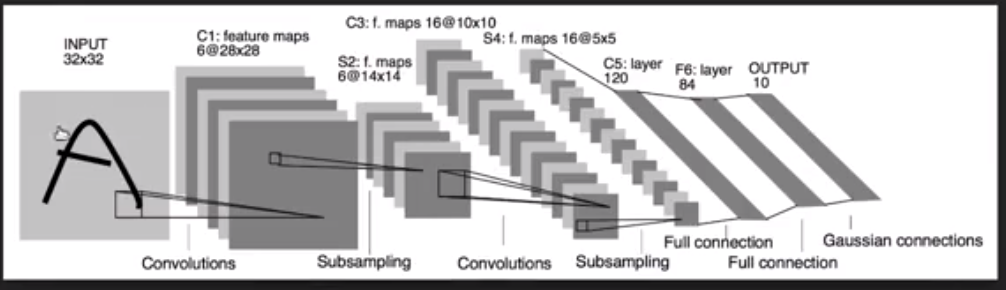

In [ ]:
import torch
from torch import nn

class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv_unit = nn.Sequential(
            # x: [b, 3, 32, 32] => [b, 6, x, x]
            nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0),

            # x: [b, 6, x, x] => [b, 6, x/2, x/2]
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            # x: [b, 6, x/2, x/2] => [b, 16, x/2, x/2]
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),

            # x: [b, 16, x/2, x/2] => [b, 16, x/4, x/4]
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        # flatten， 可以在forward中使用x = x.view(x.size(0), -1)直接实现

        # fc unit
        self.fc_unit = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )


    def forward(self, x):

        # [b, 3, 32, 32] => [b, 16, 5, 5]
        x = self.conv_unit(x)

        # [b, 16, 5, 5] => [b, 16*5*5]
        x = x.view(x.size(0), -1)

        # [b, 16*5*5] => [b, 10]
        logits = self.fc_unit(x) # 这里为什么要叫logits呢？ 进入softmax之前的值

        return logits
    



### ResNet18 的实现

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class ResBlk(nn.Module):
    def __init__(self, ch_in, ch_out, stride=1):
        super(ResBlk, self).__init__()

        self.conv1 = nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(ch_out)

        self.conv2 = nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(ch_out)

        # 避免维度不一致，无法相加
        if ch_in != ch_out:
            self.extra = nn.Sequential(
                nn.Conv2d(ch_in, ch_out, kernel_size=1, stride=stride),
                nn.BatchNorm2d(ch_out)
            )
        else:
            self.extra = nn.Sequential() # 空操作代表什么？


    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        # short-cut element-wise add: out + x
        out = F.relu(self.extra(x) + out)
        return out



class ResNet18(nn.Module):
    def __init__(self):
        super(ResNet18, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64)
        )

        self.blk1 = ResBlk(64, 128, stride=2)
        self.blk2 = ResBlk(128, 256, stride=2)
        self.blk3 = ResBlk(256, 512, stride=2)
        self.blk4 = ResBlk(512, 1024, stride=2) # channel数量慢慢增加，图片尺寸慢慢减小
        self.out_layer = nn.Linear(1024, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.blk1(x)
        x = self.blk2(x)
        x = self.blk3(x)
        x = self.blk4(x)
        x = F.adaptive_avg_pool2d(x, [1, 1]) # [b, 512, h, w] -> [b, 512, 1, 1]
        x = self.out_layer(x.view(x.size(0), -1)) 

        return x

### 模块化

In [31]:
import torch
from torch import nn


train_dataloader, validation_dataloader,test_dataloader = load_cifar10()

device = torch.device('cuda')
model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criteon = nn.CrossEntropyLoss().to(device)
for epoch in range(1000):

    model.train()
    for batch_idx, (x, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        logits = model(x)
        loss = criteon(logits, y)
        optimizer.zero_grad() # 梯度清零, 否则会累加
        loss.backward()
        optimizer.step()

    print(loss.item())

    total_correct = 0
    model.eval()
    for x, label in test_dataloader:
        x,label = x.to(device), label.to(device)

        with torch.no_grad():
            
            logits = model(x)
            pred = logits.argmax(dim=1)
            total_correct += torch.eq(pred, label).float().sum().item()
    print('test acc:', total_correct / len(test_dataloader.dataset))

0.7474960088729858
test acc: 0.7984
2.9802305334669654e-07
test acc: 0.7844
0.029194524511694908
test acc: 0.7875
0.5267472863197327
test acc: 0.7946
5.7218065194319934e-05
test acc: 0.796
1.028249740600586
test acc: 0.7873
0.0015806944575160742
test acc: 0.798
